In [7]:
import os,sys
import Image
f = open("../../trainResized/1.Bmp",'r')
jpgfile = Image.open(f)
print jpgfile
print jpgfile.size, jpgfile.format


<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=20x20 at 0x7F63F91C9950>
(20, 20) BMP


In [68]:
print jpgfile

<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=20x20 at 0x7F7A9199E680>


In [72]:
a = numpy.array(jpgfile)
print a.shape
print a
f.close()

(20, 20, 3)
[[[148  24  33]
  [152  25  31]
  [169  52  68]
  ..., 
  [152  20  30]
  [154  23  28]
  [151  26  30]]

 [[154  25  32]
  [152  27  33]
  [153  26  32]
  ..., 
  [151  27  33]
  [148  28  33]
  [153  28  34]]

 [[152  27  31]
  [155  26  32]
  [153  23  35]
  ..., 
  [154  30  33]
  [157  29  36]
  [154  29  33]]

 ..., 
 [[ 52  28  31]
  [105  22  22]
  [ 88  26  41]
  ..., 
  [ 54  22  30]
  [ 55  22  34]
  [150  32  29]]

 [[156  35  40]
  [156  34  32]
  [160  35  36]
  ..., 
  [153  30  29]
  [157  35  33]
  [155  30  28]]

 [[161  35  38]
  [161  31  35]
  [164  40  38]
  ..., 
  [159  33  34]
  [159  29  39]
  [158  34  36]]]


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
print numpy.array(jpgfile).shape

(20, 20, 3)


In [5]:
data = numpy.zeros((6283,400))
print data.shape

(6283, 400)


In [8]:
for i in range(1,6284):
    f = open("../../trainResized/" + str(i) + ".Bmp",'r')
    img = Image.open(f)
    temp = numpy.array(img)
    flag = False
    if len(temp.shape) == 2:
        flag = True
#     print temp.shape, flag
    tot = 0
    for c in range(0,20):
        for r in range(0,20):
            if flag:
                data[i-1][c*20+r] = temp[c][r]
            else:
                data[i-1][c*20+r] = (0.299 * temp[c][r][0] + 0.587 *temp[c][r][1] + 0.114 *temp[c][r][2])
            if data[i-1][c*20 +r] > 127:
                tot = tot+1
#     tot = tot /400;
    if(tot > 200):
        for c in range(0,400):
            data[i-1][c] = 255 - data[i-1][c]
    f.close()

In [9]:
testD = numpy.zeros((6220,400))
for i in range(6284,12504):
    f = open("../../testResized/" + str(i) + ".Bmp",'r')
    img = Image.open(f)
    temp = numpy.array(img)
    flag = False
    if len(temp.shape) == 2:
        flag = True
#     print temp.shape, flag
    tot = 0
    for c in range(0,20):
        for r in range(0,20):
            if flag:
                testD[i-6284][c*20+r] = temp[c][r]
            else:
                testD[i-6284][c*20+r] = (0.299 * temp[c][r][0] + 0.587 *temp[c][r][1] + 0.114 *temp[c][r][2])
            
            if testD[i-6284][c*20 +r] > 127:
                tot = tot+1
                
#     tot = tot /400;
    if(tot > 200):
        for c in range(0,400):
            testD[i-6284][c] = 255 - testD[i-6284][c]
    f.close()
print testD.shape

(6220, 400)


In [10]:
import pandas
dataY = pandas.read_csv('../../trainLabels.csv')
dataY.info()
Y = dataY.Class.values
X = data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6283 entries, 0 to 6282
Data columns (total 2 columns):
ID       6283 non-null int64
Class    6283 non-null object
dtypes: int64(1), object(1)
memory usage: 147.3+ KB


In [11]:
print Y

['n' '8' 'T' ..., 'P' 'N' 'R']


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


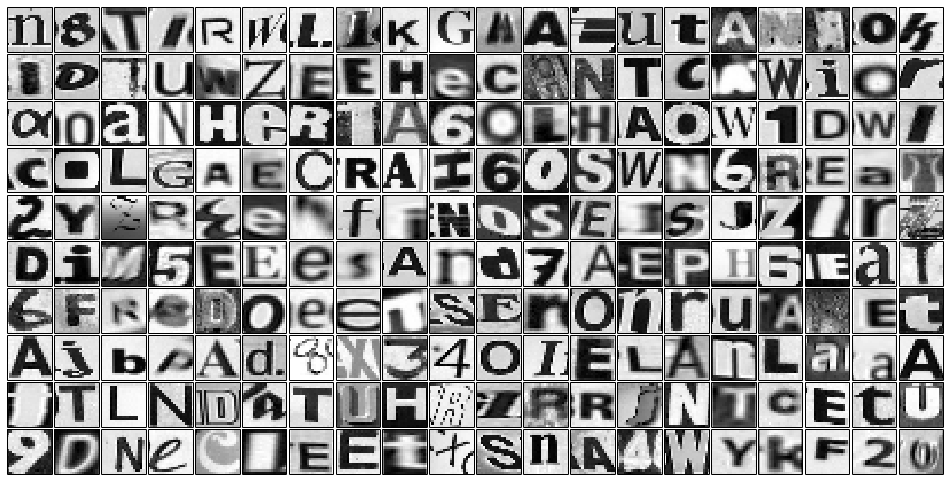

In [12]:
%pylab inline
fig = plt.figure(figsize=(13, 13))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(200):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(data[i].reshape(20,20), cmap=plt.cm.binary,
              interpolation='nearest')
    
#     # label the image with the target value
#     if predicted[i] == expected[i]:
#         ax.text(0, 7, str(predicted[i]), color='green')
#     else:
#         ax.text(0, 7, str(predicted[i]), color='red')

In [88]:
# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [26]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=100)
xs = pca.fit_transform(X)
# xs = X
ys = Y

In [27]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier?
classifier = RandomForestClassifier(n_estimators=2000, verbose = 3, n_jobs=-1)
# classifier = RandomForestClassifier(n_estimators=1000, verbose = 1)

In [ ]:
# split the data into training and validation sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs,ys)
X_train = xs
y_train = ys
# train the model
classifier.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = classifier.predict(X_test)
expected = y_test

In [20]:
matches = (predicted == expected)
print matches.sum()
print len(matches)

1570
1571


In [24]:
def writeFile(y_data):
    f = open('myfile','w')
    f.write("ID,Class\n")
    i = 6284;
    for k in y_data:
        f.write(str(i) + "," + str(k) + "\n")
        i = i+1
    f.close()

In [21]:
pred = classifier.predict(testD)
print pred

['I' 'E' 'A' ..., 'R' 'N' 'M']


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    4.0s remaining:   12.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.0s finished


Populating the interactive namespace from numpy and matplotlib


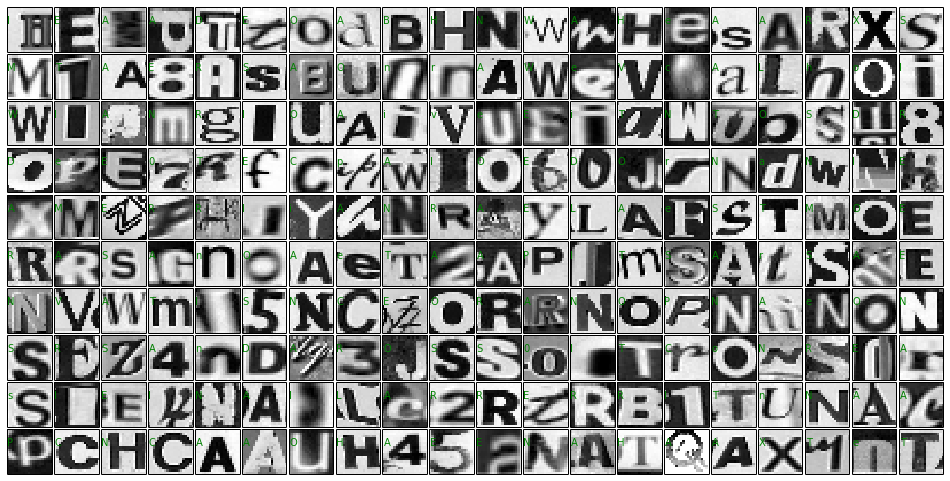

In [22]:
%pylab inline
fig = plt.figure(figsize=(13, 13))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(200):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(testD[i].reshape(20,20), cmap=plt.cm.binary,
              interpolation='nearest')
    ax.text(0, 7, str(pred[i]), color='green')  
#     # label the image with the target value
#     if predicted[i] == expected[i]:
# ax.text(0, 7, str(predicted[i]), color='green')
#     else:
#         ax.text(0, 7, str(predicted[i]), color='red')

In [25]:
writeFile(pred)